In [ ]:
f!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# #1. Reading and Analysing the DataFrame

In [ ]:
# Importing dataset
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dineout/0001_all_restnt_details.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Rating,Location,Cuisine,Votes,Cost
0,0,Local,4.1/52415 votes,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415 votes,₹ 2000 for two (approx.)
1,1,The G.T. ROAD,4.3/52363 votes,"M-Block,Connaught Place, Central Delhi",North Indian,2363 votes,₹ 1500 for two (approx.)
2,2,Tamasha,4.2/55016 votes,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016 votes,₹ 2000 for two (approx.)
3,3,The Junkyard Cafe,4.2/52821 votes,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821 votes,₹ 1800 for two (approx.)
4,4,Chili's American Grill and Bar,4.4/51094 votes,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094 votes,₹ 2000 for two (approx.)


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

**Observation:** 
1. 'Cost' column requires cleaning.
2. 'Votes' column requires cleaning.
3. Location requires splitting into city and locality. 
4. 'Rating' column requires cleaning.

In [ ]:
print('* Size of dataframe: {}\n'.format(df.shape))
print('* Datatype of columns are:\n {}\n'.format(df.dtypes))
# print('* Count of different product categories:\n {}\n'.format(df['product'].value_counts()))
print('* Number of NaNs among ratings are: {}\n'.format(df['Rating'].isnull().sum())) 

* Size of dataframe: (7533, 6)

* Datatype of columns are:
 Name        object
Rating      object
Location    object
Cuisine     object
Votes       object
Cost        object
dtype: object

* Number of NaNs among ratings are: 938



# Dropping NaNs

In [ ]:
df.isna().sum()
# ecom_ram_clean.isna().sum()

Name          0
Rating      938
Location      0
Cuisine       0
Votes         0
Cost          0
dtype: int64

In [ ]:
df = df.dropna(subset=['Rating'])
df.reset_index(drop=True, inplace=True)   # resetting indexes after dropping nans

In [ ]:
df.shape

(6595, 6)

In [ ]:
# Del
y = df['Rating'][2].split('/', 1)
y[0]

'4.2'

# #2. Cleaning Dataset

## Cleaning Rating Column 

In [ ]:
df_clean = pd.DataFrame()
# df['Rating'] = df['Rating'].astype(str) 
for index, rating in enumerate(df['Rating']):
    x = df['Rating'][index].split('/', 1)  # x is keeping 4.1. Needs correction
    df['Rating'][index] = x[0]
    # print(x)

In [ ]:
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415 votes,₹ 2000 for two (approx.)
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363 votes,₹ 1500 for two (approx.)
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016 votes,₹ 2000 for two (approx.)
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821 votes,₹ 1800 for two (approx.)
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094 votes,₹ 2000 for two (approx.)


## Adding City using Location Column 

    ### Adding City Column

In [ ]:
city = df['Location'].str.rsplit(' ', n=1, expand = True)
df['City'] = city[1]

# new = data["Name"].str.split(" ", n = 1, expand = True) 
    
# # making separate first name column from new data frame 
# data["First Name"]= new[0]

In [ ]:
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost,City
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415 votes,₹ 2000 for two (approx.),Delhi
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363 votes,₹ 1500 for two (approx.),Delhi
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016 votes,₹ 2000 for two (approx.),Delhi
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821 votes,₹ 1800 for two (approx.),Delhi
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094 votes,₹ 2000 for two (approx.),Delhi


In [ ]:
# df[['Name', 'Location', 'City', 'Cuisine', 'Rating', 'Votes', 'Cost' ]]
# df.head()

In [ ]:
df['City'].value_counts()

Bangalore       1016
Delhi            735
Kolkata          585
Hyderabad        494
Ahmedabad        415
Chennai          388
Pune             351
Jaipur           268
Mumbai           216
Indore           204
Gurgaon          184
Chandigarh       151
Western          132
Noida            106
North            106
Secunderabad      95
Vadodara          91
Lucknow           80
West              78
Agra              75
Bandra            74
Nagpur            66
Surat             64
Suburbs           62
Ludhiana          62
Mohali            61
Thane             61
East              60
Goa               60
Ghaziabad         50
Udaipur           43
Faridabad         40
Zirakpur          26
Panchkula         26
Powai             26
Howrah            21
Dombivali         15
South              3
Kochi              2
Highway            2
Mysore             1
Name: City, dtype: int64

In [ ]:
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost,City
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415 votes,₹ 2000 for two (approx.),Delhi
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363 votes,₹ 1500 for two (approx.),Delhi
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016 votes,₹ 2000 for two (approx.),Delhi
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821 votes,₹ 1800 for two (approx.),Delhi
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094 votes,₹ 2000 for two (approx.),Delhi


### Finding Cities Corersponding to Unknown Values 

#### Looking for city corresponding to 'North'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'North':
    print(df['Location'][index])

Bangur Avenue, 24 Parganas North
Bangur Avenue, 24 Parganas North
Bangur Avenue, 24 Parganas North
Bangur Avenue, 24 Parganas North
Diamond Plaza Mall,Jessore Road, 24 Parganas North
Bangur Avenue, 24 Parganas North
Dumdum, 24 Parganas North
Dumdum, 24 Parganas North
Jessore Road, 24 Parganas North
Diamond Plaza Mall,Jessore Road, 24 Parganas North
Dumdum, 24 Parganas North
Diamond Plaza Mall,Jessore Road, 24 Parganas North
Diamond Plaza Mall,Jessore Road, 24 Parganas North
Dumdum, 24 Parganas North
Kestopur, 24 Parganas North
Jessore Road, 24 Parganas North
Dumdum, 24 Parganas North
Baguiati, 24 Parganas North
Nagerbazar, 24 Parganas North
Baranagar, 24 Parganas North
Kestopur, 24 Parganas North
Baguiati, 24 Parganas North
Baguiati, 24 Parganas North
Meena Tower,Rajarhat, 24 Parganas North
Atithi Inn,Baguiati, 24 Parganas North
The Meridian Building,Baguiati, 24 Parganas North
Tarun Alo Apartment,Rajarhat, 24 Parganas North
Rajarhat, 24 Parganas North
Teghoria, 24 Parganas North
City 

Parganas is in Kolkata

#### Looking for city correspoding to 'Western'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'Western':
    print(df['Location'][index])

Lily Tower,Jogeshwari West, North Western
EE Heights,Jogeshwari West, North Western
The Fern Hotel,Goregaon East, North Western
The Westin Mumbai Garden City Hotel,Goregaon East, North Western
Goregaon East, North Western
Oberoi Mall,Goregaon East, North Western
Malad East, North Western
Goregaon West, North Western
Oshiwara, North Western
Goregaon West, North Western
Oshiwara, North Western
Oshiwara, North Western
Goregaon East, North Western
Oshiwara, North Western
Oshiwara, North Western
Oshiwara, North Western
Malad West, North Western
Chandiwala Arcade,Goregaon West, North Western
Goregaon West, North Western
Malad West, North Western
Goregaon West, North Western
Malad West, North Western
Inorbit Mall,Malad West, North Western
Inorbit Mall,Malad West, North Western
Inorbit Mall,Malad West, North Western
HyperCITY Mall,Malad West, North Western
Vastu Tower,Goregaon East, North Western
Inorbit Mall,Malad West, North Western
Malad West, North Western
First Avenue,Goregaon West, North

All these locations correspond to Mumbai

#### Looking for city corresponding to 'Highway'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'Highway':
    print(df['Location'][index])

Somanahalli, Mysore Highway
Kunigal, Bangalore Mangalore Highway


These locations are in Bangalore

#### Looking for city corresponding to 'Highway'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'Highway':
    print(df['Location'][index])

Somanahalli, Mysore Highway
Kunigal, Bangalore Mangalore Highway


These locations are in Bangalore

#### Looking for city corresponding to 'West'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'West':
    print(df['Location'][index])

Janki Kutir Society,Juhu, Andheri West
Vishwakarma Baug,Vile Parle West, Andheri West
Vile Parle West, Andheri West
Juhu, Andheri West
Sarkar Corner,Near Andheri West Station, Andheri West
Juhu, Andheri West
Near Andheri West Station, Andheri West
Veera Desai, Andheri West
Juhu, Andheri West
Near Andheri West Station, Andheri West
Tian Building,Juhu, Andheri West
Morya Classic,Veera Desai, Andheri West
Versova, Andheri West
Juhu, Andheri West
Juhu, Andheri West
Andheri Lokhandwala, Andheri West
Crescent Royale,Near Andheri West Station, Andheri West
Andheri Lokhandwala, Andheri West
Andheri Link Road , Andheri West
Juhu, Andheri West
JW Marriott Hotel,Juhu, Andheri West
Ashiyana Apartment,Juhu, Andheri West
Crescent Royale,Near Andheri West Station, Andheri West
Navratan Apartment,Juhu, Andheri West
Near Andheri West Station, Andheri West
Near Andheri West Station, Andheri West
Jaldarshan Building,Juhu, Andheri West
DN Nagar, Andheri West
Juhu, Andheri West
Boolani Estate Owners Premis

These locations are in Mumbai

#### Looking for city corresponding to 'Suburbs'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'Suburbs':
    print(df['Location'][index])

Mayfair Sonata Green CHS,Vikhroli West, Central Suburbs
Vikhroli West, Central Suburbs
R City Mall,Ghatkopar West, Central Suburbs
R City Mall,Ghatkopar West, Central Suburbs
R City Mall,Ghatkopar West, Central Suburbs
R City Mall,Ghatkopar West, Central Suburbs
Imagine Studio,Vikhroli East, Central Suburbs
Ghatkopar West, Central Suburbs
R City Mall,Ghatkopar West, Central Suburbs
The Roa Hotel,Ghatkopar West, Central Suburbs
R City Mall,Ghatkopar West, Central Suburbs
Ghatkopar West, Central Suburbs
Vallabh Vihar,Ghatkopar East, Central Suburbs
Ghatkopar West, Central Suburbs
Eastern Business District,Bhandup West, Central Suburbs
Eastern Business District,Bhandup West, Central Suburbs
Phoenix Marketcity Mall,Kurla West, Central Suburbs
Phoenix Marketcity Mall,Kurla West, Central Suburbs
Phoenix Marketcity Mall,Kurla West, Central Suburbs
Phoenix Marketcity Mall,Kurla West, Central Suburbs
The Destination SRA CHS Ltd,Ghatkopar East, Central Suburbs
The Destination SRA CHS Ltd,Ghatkop

These locations are in Mumbai

#### Looking for city corresponding to 'East'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'East':
    print(df['Location'][index])

Times Square Tech Park,Sakinaka, Andheri East
Sagar Pallazio Mall,Sakinaka, Andheri East
Near Andheri East Station, Andheri East
Premier Emperor Building,Marol, Andheri East
Sakinaka, Andheri East
Sagar Pallazio Mall,Sakinaka, Andheri East
The Peninsula Grand Hotel,Sakinaka, Andheri East
Sakinaka, Andheri East
The Peninsula Grand Hotel,Sakinaka, Andheri East
Marol, Andheri East
Sakinaka, Andheri East
Sakinaka, Andheri East
Sakinaka, Andheri East
Times Square Tech Park,Sakinaka, Andheri East
Sakinaka, Andheri East
Marol, Andheri East
Marol, Andheri East
M.I.D.C, Andheri East
Marol, Andheri East
Sahar Airport Road, Andheri East
Marol, Andheri East
Marol, Andheri East
Marol, Andheri East
Marol, Andheri East
Marol, Andheri East
Marol, Andheri East
Marol, Andheri East
Marol, Andheri East
Sahar Airport Road, Andheri East
Marol, Andheri East
M.I.D.C, Andheri East
Chakala, Andheri East
M.I.D.C, Andheri East
M.I.D.C, Andheri East
M.I.D.C, Andheri East
Near Andheri East Station, Andheri East
M.I

These locations are in Mumbai

#### Looking for city corresponding to 'South'

In [ ]:
for index, restnt in enumerate(df['City']):
  if df['City'][index] == 'South':
    print(df['Location'][index])

Narendrapur, 24 Parganas South
Narendrapur, 24 Parganas South
Narendrapur, 24 Parganas South


These locations are in Mumbai

### Replacing unknown values with cities

In [ ]:
df['City'] = df['City'].replace({'Secunderabad': 'Hyderabad', 'Bandra':'Mumbai', 'Thane':"Mumbai", 'Powai': 'Mumbai', 'Dombivali':'Mumbai', 'Western':'Mumbai', 'West':'Mumbai', 'Suburbs':'Mumbai', 'East':'Mumbai', 'South':'Mumbai', 'Faridabad': 'Noida', 'Zirakpur':'Chandigarh', 'Mohali':'Chandigarh', 'Panchkula':'Chandigarh', 'Howrah':'Kolkata', 'North':'Kolkata','Mysore':'Bangalore', 'Highway':'Bangalore'})
df['City'].value_counts()

Bangalore     1019
Delhi          735
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      415
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64

In [ ]:
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost,City
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415 votes,₹ 2000 for two (approx.),Delhi
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363 votes,₹ 1500 for two (approx.),Delhi
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016 votes,₹ 2000 for two (approx.),Delhi
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821 votes,₹ 1800 for two (approx.),Delhi
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094 votes,₹ 2000 for two (approx.),Delhi


## Adding Locality Column using Location Column

In [ ]:
locality = df['Location'].str.rsplit(',', n=1, expand = True)
locality

,0,1
0,"Scindia House,Connaught Place",Central Delhi
1,"M-Block,Connaught Place",Central Delhi
2,Connaught Place,Central Delhi
3,Connaught Place,Central Delhi
4,"M-Block,Connaught Place",Central Delhi
...,...,...
6590,"Wave Mall,BRS Nagar",West Ludhiana
6591,"Radisson Blu,Rajguru Nagar",West Ludhiana
6592,BRS Nagar,West Ludhiana
6593,"Nirvana Hotel Banquets Club,PAU",Central Ludhiana


In [ ]:
df['Locality'] = locality[1]
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost,City,Locality
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415 votes,₹ 2000 for two (approx.),Delhi,Central Delhi
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363 votes,₹ 1500 for two (approx.),Delhi,Central Delhi
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016 votes,₹ 2000 for two (approx.),Delhi,Central Delhi
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821 votes,₹ 1800 for two (approx.),Delhi,Central Delhi
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094 votes,₹ 2000 for two (approx.),Delhi,Central Delhi


In [ ]:
x = df['Locality'].value_counts()
print(x)

 South Bangalore    364
 South Delhi        339
 South Kolkata      310
 West Ahmedabad     237
 East Bangalore     235
                   ... 
 North Kochi          1
 North Nagpur         1
 East Kochi           1
 West Indore          1
 East Udaipur         1
Name: Locality, Length: 108, dtype: int64


In [ ]:
# Top 30 localities
x[:30]  

 South Bangalore           364
 South Delhi               339
 South Kolkata             310
 West Ahmedabad            237
 East Bangalore            235
 West Hyderabad            221
 Gurgaon                   184
 West Delhi                174
 West Pune                 171
 North Bangalore           170
 East Kolkata              141
 East Pune                 141
 North Western             132
 East Indore               130
 Central Bangalore         128
 South Mumbai              123
 West Bangalore            119
 Central Chennai           111
 Central Delhi             111
 24 Parganas North         106
 Central Kolkata           101
 Noida                      96
 South Jaipur               96
 Secunderabad               95
 Navi Mumbai                93
 North Ahmedabad            91
 Central East Hyderabad     87
 South West Chennai         84
 Central West Hyderabad     83
 North Chennai              82
Name: Locality, dtype: int64

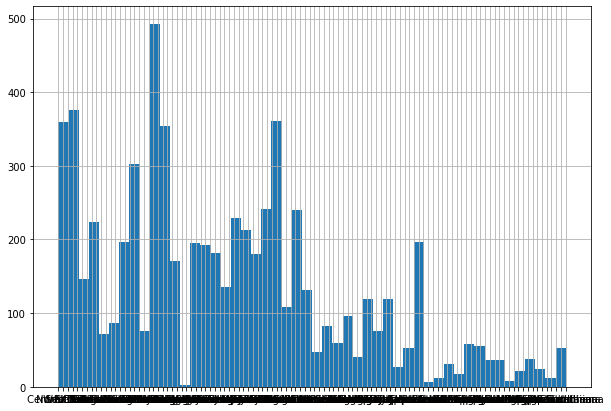

In [ ]:
# Restaurant distribution in different localities 
import matplotlib.pyplot as plt
%matplotlib inline
df['Locality'].hist(bins=50, figsize=(10,7))
# xlabel
plt.show()

    ## Cleaning Votes Column

In [ ]:
votes = df['Votes'].str.split(' ', n=1, expand = True)
df['Votes'] = votes[0]
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost,City,Locality
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415,₹ 2000 for two (approx.),Delhi,Central Delhi
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363,₹ 1500 for two (approx.),Delhi,Central Delhi
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016,₹ 2000 for two (approx.),Delhi,Central Delhi
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821,₹ 1800 for two (approx.),Delhi,Central Delhi
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094,₹ 2000 for two (approx.),Delhi,Central Delhi


## Cleaning Cost Column

In [ ]:
cost = df['Cost'].str.split(' ', n=2, expand = True)
df['Cost'] = cost[1]
df.head()

,Name,Rating,Location,Cuisine,Votes,Cost,City,Locality
0,Local,4.1,"Scindia House,Connaught Place, Central Delhi","North Indian, Finger Food, Continental",2415,2000,Delhi,Central Delhi
1,The G.T. ROAD,4.3,"M-Block,Connaught Place, Central Delhi",North Indian,2363,1500,Delhi,Central Delhi
2,Tamasha,4.2,"Connaught Place, Central Delhi","Finger Food, North Indian, Italian, Contine...",5016,2000,Delhi,Central Delhi
3,The Junkyard Cafe,4.2,"Connaught Place, Central Delhi","North Indian, Mediterranean, Asian, Italian...",2821,1800,Delhi,Central Delhi
4,Chili's American Grill and Bar,4.4,"M-Block,Connaught Place, Central Delhi","Mexican, American, Italian",1094,2000,Delhi,Central Delhi


In [ ]:
df.shape

(6595, 8)

### Saving Dataframe as CSV

In [ ]:
# reodering columns
df = df[['Name', 'Location', 'Locality', 'City',  'Cuisine', 'Rating', 'Votes', 'Cost']]

from google.colab import files
df.to_csv('restnt_details_final-2.csv')
files.download('restnt_details_final-2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# #del
# df = df[['Name', 'Location', 'Locality', 'City',  'Cuisine', 'Rating', 'Votes', 'Cost']]
# df.head()

In [ ]:
### Performing Minor Corrections and Re-Downloading

In [ ]:
# # Importing dataset
# from google.colab import drive
# drive.mount("/content/gdrive")

In [ ]:
# import pandas as pd
# df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dineout/0001 - all_restnt_details_clean (copy).csv')

In [ ]:
# df.head()

In [ ]:
# df[['Name', 'Location', 'City', 'Locality', 'Rating', 'Votes', 'Cost']]

In [ ]:
# df.shape

In [ ]:
# df.to_csv('dineout_restaurants_final.csv')
# files.download('dineout_restaurants_final.csv')